In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path1 = r'E:\netData\APS\1 Authors\APS_authors 2.0.zip'
f1 = pd.read_csv(path1)
f1['type'] = f1['type'].map(dict(zip(['获奖学者','非获奖学者'] , ['laureate' , 'non laureate'])))

# figure

In [5]:
f10 = f1[f1['type']=='non laureate']
f11 = f1[f1['type']=='laureate']

Text(0, 0.5, 'Disruptive Impact (SDC)')

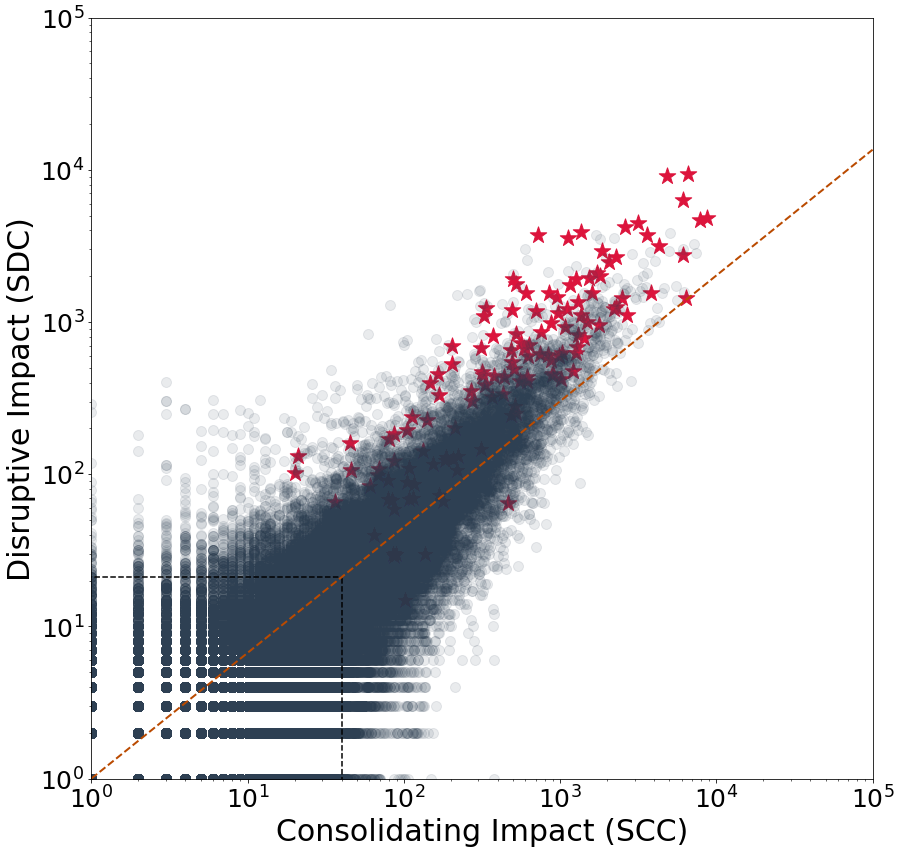

In [7]:
f, ax = plt.subplots(figsize=(14, 14))

for i in range(len(f11)):
    x = f11['CC'].values[i]
    y = f11['DC'].values[i]
    ax.scatter(x, y, s=300, c='#DC143C' , marker = "*", vmin=0, vmax=100)

for j in range(len(f10)):
    x = f10['CC'].values[j]
    y = f10['DC'].values[j]
    ax.scatter(x, y, s=100, c='#2E4053' , marker = "o", vmin=0, vmax=100, alpha = 0.1)

d1 = np.mean(f1['DC'])
d2 = np.mean(f1['CC'])
ax.vlines(d2,0,d1, linestyles='dashed',colors = '#000000')
ax.hlines(d1,0,d2, linestyles='dashed',colors = '#000000')
ax.axline([1,1],[d2,d1],linestyle = '--', linewidth=2,c = '#BA4A00')

ax.set_xscale("log")
ax.set_yscale("log")

plt.xlim((1,10e4))
plt.ylim((1,10e4))
plt.xticks(size = 25)
plt.yticks(size = 25)

plt.xlabel(r'Consolidating Impact (SCC)',fontsize = 30)
plt.ylabel(r'Disruptive Impact (SDC)',fontsize = 30)

Text(0, 0.5, 'Disruptive Impact (D h)')

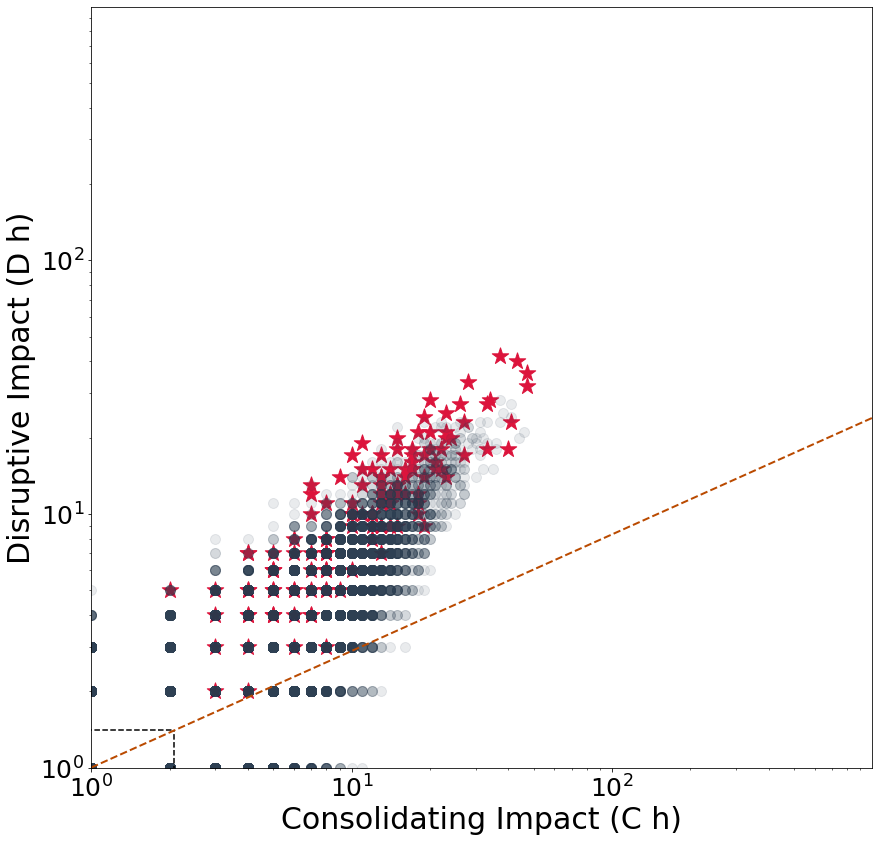

In [8]:
f, ax = plt.subplots(figsize=(14, 14))

for i in range(len(f11)):
    x = f11['ch'].values[i]
    y = f11['dh'].values[i]
    ax.scatter(x, y, s=300, c='#DC143C' , marker = "*", vmin=0, vmax=100)

for j in range(len(f10)):
    x = f10['ch'].values[j]
    y = f10['dh'].values[j]
    ax.scatter(x, y, s=100, c='#2E4053' , marker = "o", vmin=0, vmax=100, alpha = 0.1)

d1 = np.mean(f1['dh'])
d2 = np.mean(f1['ch'])
ax.vlines(d2,0,d1, linestyles='dashed',colors = '#000000')
ax.hlines(d1,0,d2, linestyles='dashed',colors = '#000000')
ax.axline([1,1],[d2,d1],linestyle = '--', linewidth=2,c = '#BA4A00')

ax.set_xscale("log")
ax.set_yscale("log")

plt.xticks([10e-1,10e0,10e1],size = 25)
plt.yticks([10e-1,10e0,10e1],size = 25)

plt.xlim((1,10e2))
plt.ylim((1,10e2))

plt.xlabel(r'Consolidating Impact (C h)',fontsize = 30)
plt.ylabel(r'Disruptive Impact (D h)',fontsize = 30)

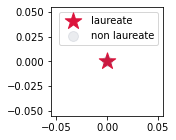

In [46]:
f, ax = plt.subplots(figsize=(2, 2))

ax.scatter(0, 0, s=300, c='#DC143C' , marker = "*", vmin=0, vmax=100 , label = 'laureate')

ax.scatter(0, 0, s=100, c='#36486b' , marker = "o", vmin=0, vmax=100, alpha = 0.1, label = 'non laureate')
plt.legend()
plt.savefig("F:/目前研究项目/APS分析/SCIENTOMETRICS SDC SCC/fig/fig 6/legend.pdf",bbox_inches = 'tight')

# roubust

In [10]:
f10 = f10.sample(n=10000,random_state = 1)

In [11]:
d1lst = [np.percentile(f1['DC'],i) for i in [50,60,70,80,90,95]]
d2lst = [np.percentile(f1['CC'],i) for i in [50,60,70,80,90,95]]
textlst = ['median','60%-percentile','70%-percentile','80%-percentile','90%-percentile','95%-percentile']

In [86]:
def draw(d1 , d2 , text):
    for i in range(len(f11)):
        x = f11['CC'].values[i]
        y = f11['DC'].values[i]
        ax.scatter(x, y, s=300, c='#DC143C' , marker = "*", vmin=0, vmax=100)

    for j in range(len(f10)):
        x = f10['CC'].values[j]
        y = f10['DC'].values[j]
        ax.scatter(x, y, s=100, c='#36486b' , marker = "o", vmin=0, vmax=100, alpha = 0.1)


    ax.vlines(d2,0,d1, linestyles='dashed',colors = '#000000')
    ax.hlines(d1,0,d2, linestyles='dashed',colors = '#000000')
    ax.axline([1,1],[d2,d1],linestyle = '--', linewidth=2,c = '#BA4A00')
    
    plt.text(1,d1*1.1,str(d1)+'  ('+text+')',c = '#D35400', fontsize=30, fontweight='bold')
    plt.text(d2,1.1,str(d2)+'  ('+text+')',c = '#D35400', fontsize=30, fontweight='bold')
    
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.xlim((1,10e4))
    plt.ylim((1,10e4))
    plt.xticks(size = 25)
    plt.yticks(size = 25)

    plt.xlabel(r'Consolidating Impact (SCC)',fontsize = 30)
    plt.ylabel(r'Disruptive Impact (SDC)',fontsize = 30)

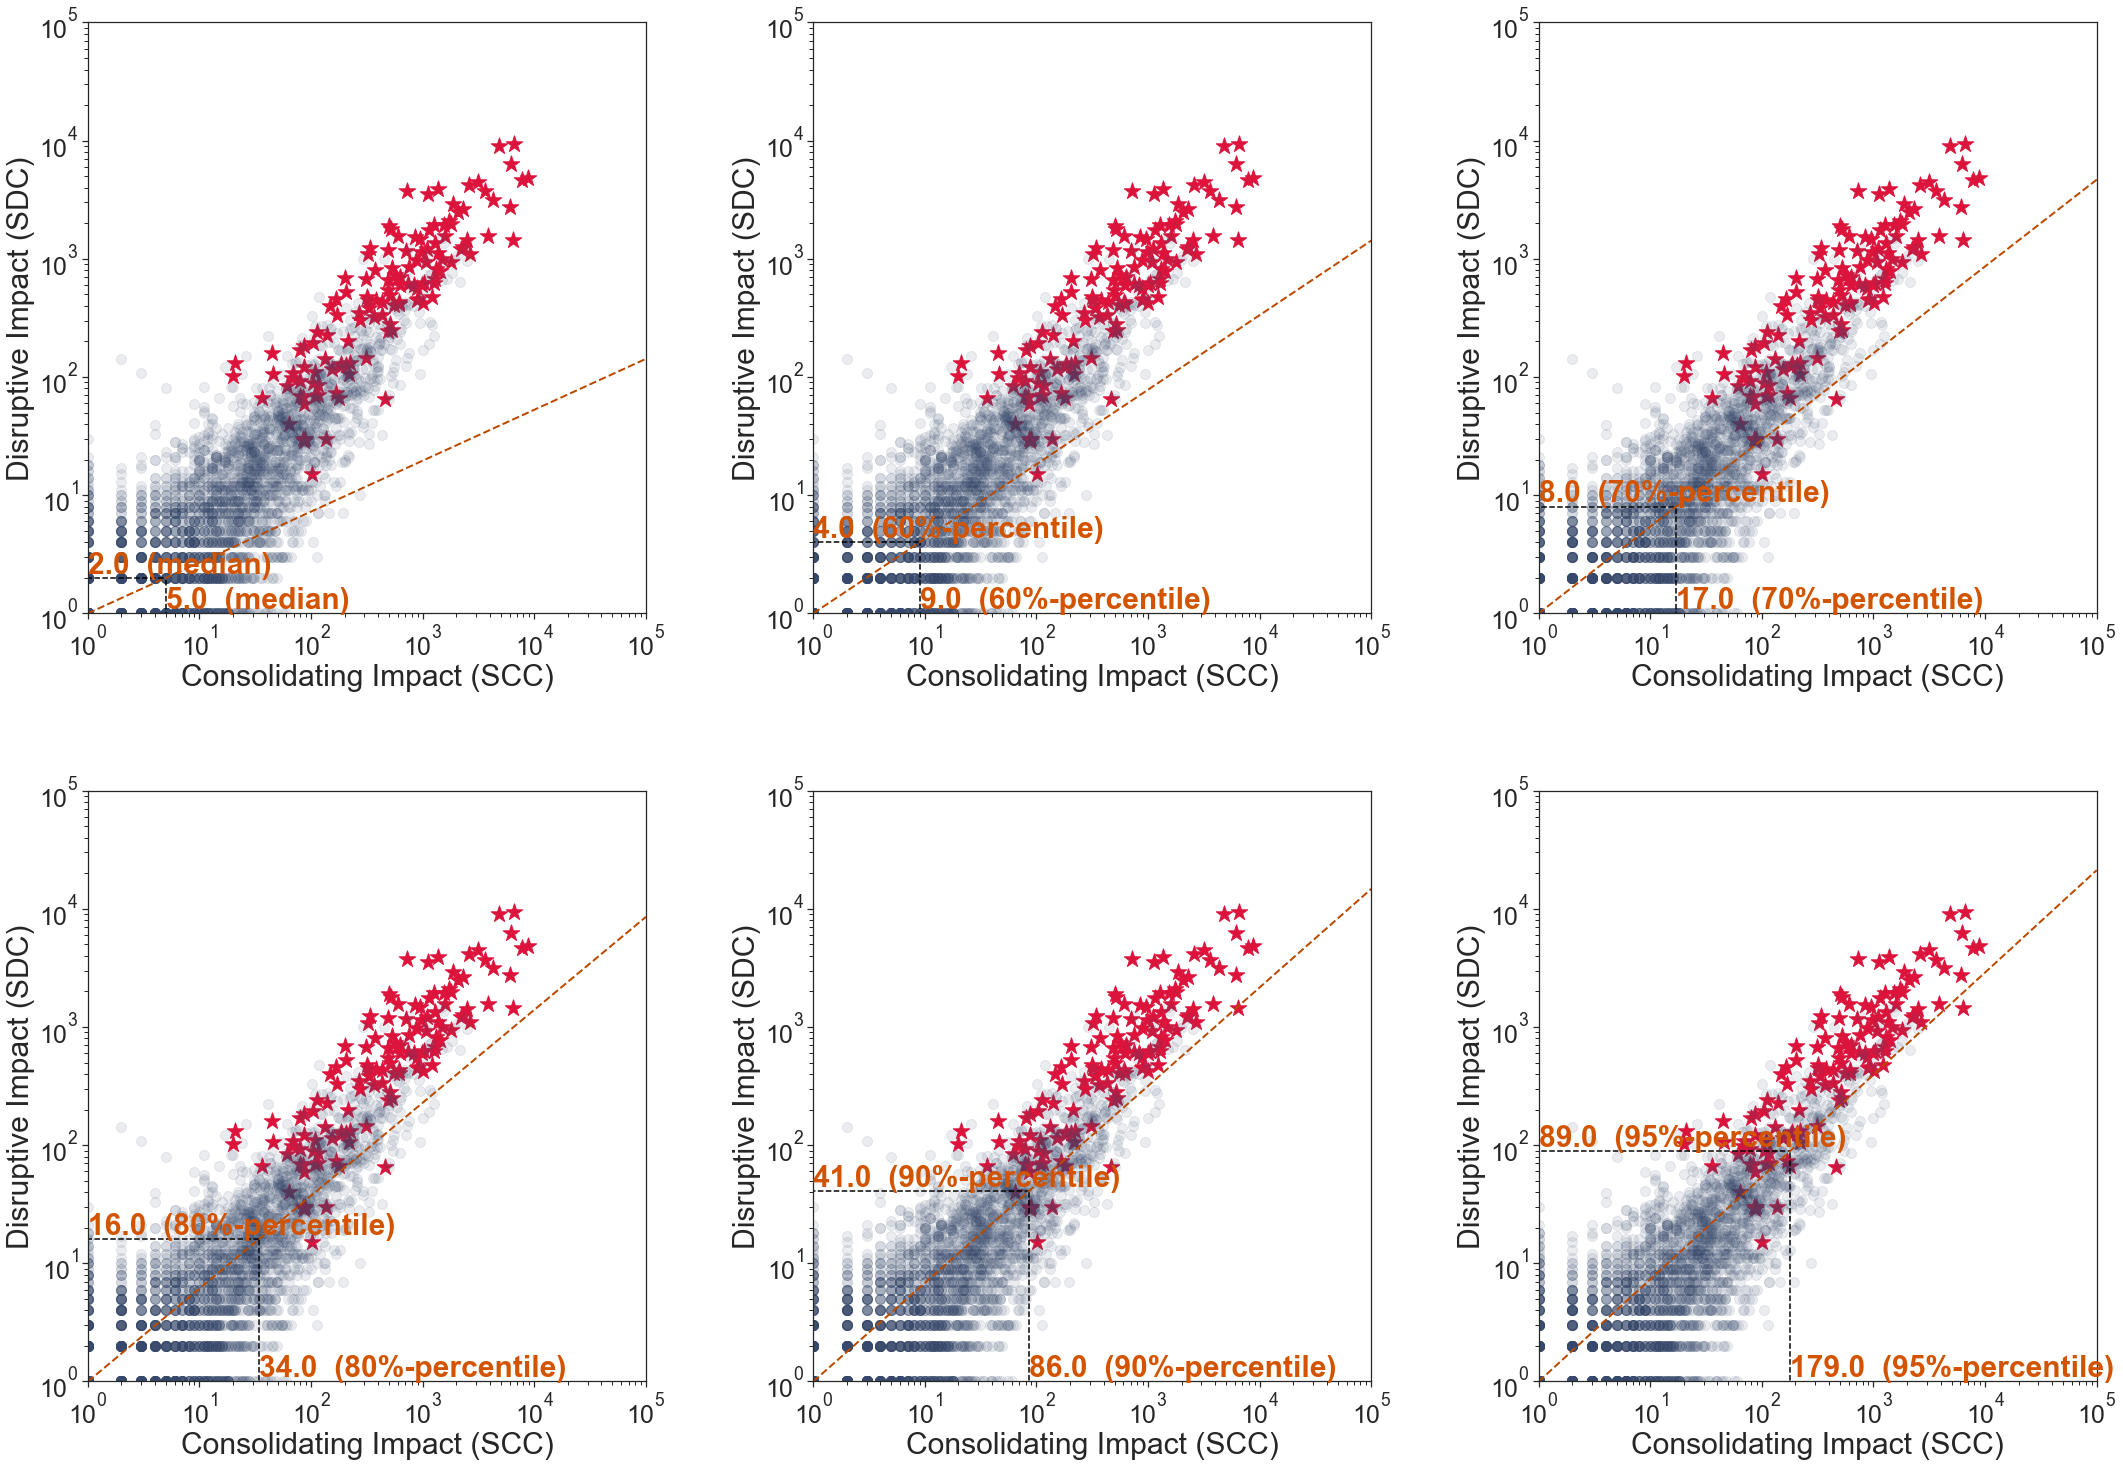

In [87]:
plt.subplots(2,3,figsize=(36,25))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.3)
sns.set_theme(style="ticks")
for _ in range(6):
    ax = plt.subplot(2,3,_+1)
    draw(d1lst[_] , d2lst[_] , textlst[_])

In [12]:
def draw2(d1 , d2 , text):
    for i in range(len(f11)):
        x = f11['ch'].values[i]
        y = f11['dh'].values[i]
        ax.scatter(x, y, s=300, c='#DC143C' , marker = "*", vmin=0, vmax=100)

    for j in range(len(f10)):
        x = f10['ch'].values[j]
        y = f10['dh'].values[j]
        ax.scatter(x, y, s=100, c='#2E4053' , marker = "o", vmin=0, vmax=100, alpha = 0.1)

    d1 = np.mean(f1['dh'])
    d2 = np.mean(f1['ch'])
    ax.vlines(d2,0,d1, linestyles='dashed',colors = '#000000')
    ax.hlines(d1,0,d2, linestyles='dashed',colors = '#000000')
    ax.axline([1,1],[d2,d1],linestyle = '--', linewidth=2,c = '#BA4A00')

    plt.text(1,d1*1.1,str(np.round(d1,2))+'  ('+text+')',c = '#D35400', fontsize=30, fontweight='bold')
    plt.text(d2,1.1,str(np.round(d2,2))+'  ('+text+')',c = '#D35400', fontsize=30, fontweight='bold')

    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.xticks([10e-1,10e0,10e1],size = 25)
    plt.yticks([10e-1,10e0,10e1],size = 25)

    plt.xlim((1,10e2))
    plt.ylim((1,10e2))
    plt.xlabel(r'Consolidating Impact (C h)',fontsize = 30)
    plt.ylabel(r'Disruptive Impact (D h)',fontsize = 30)

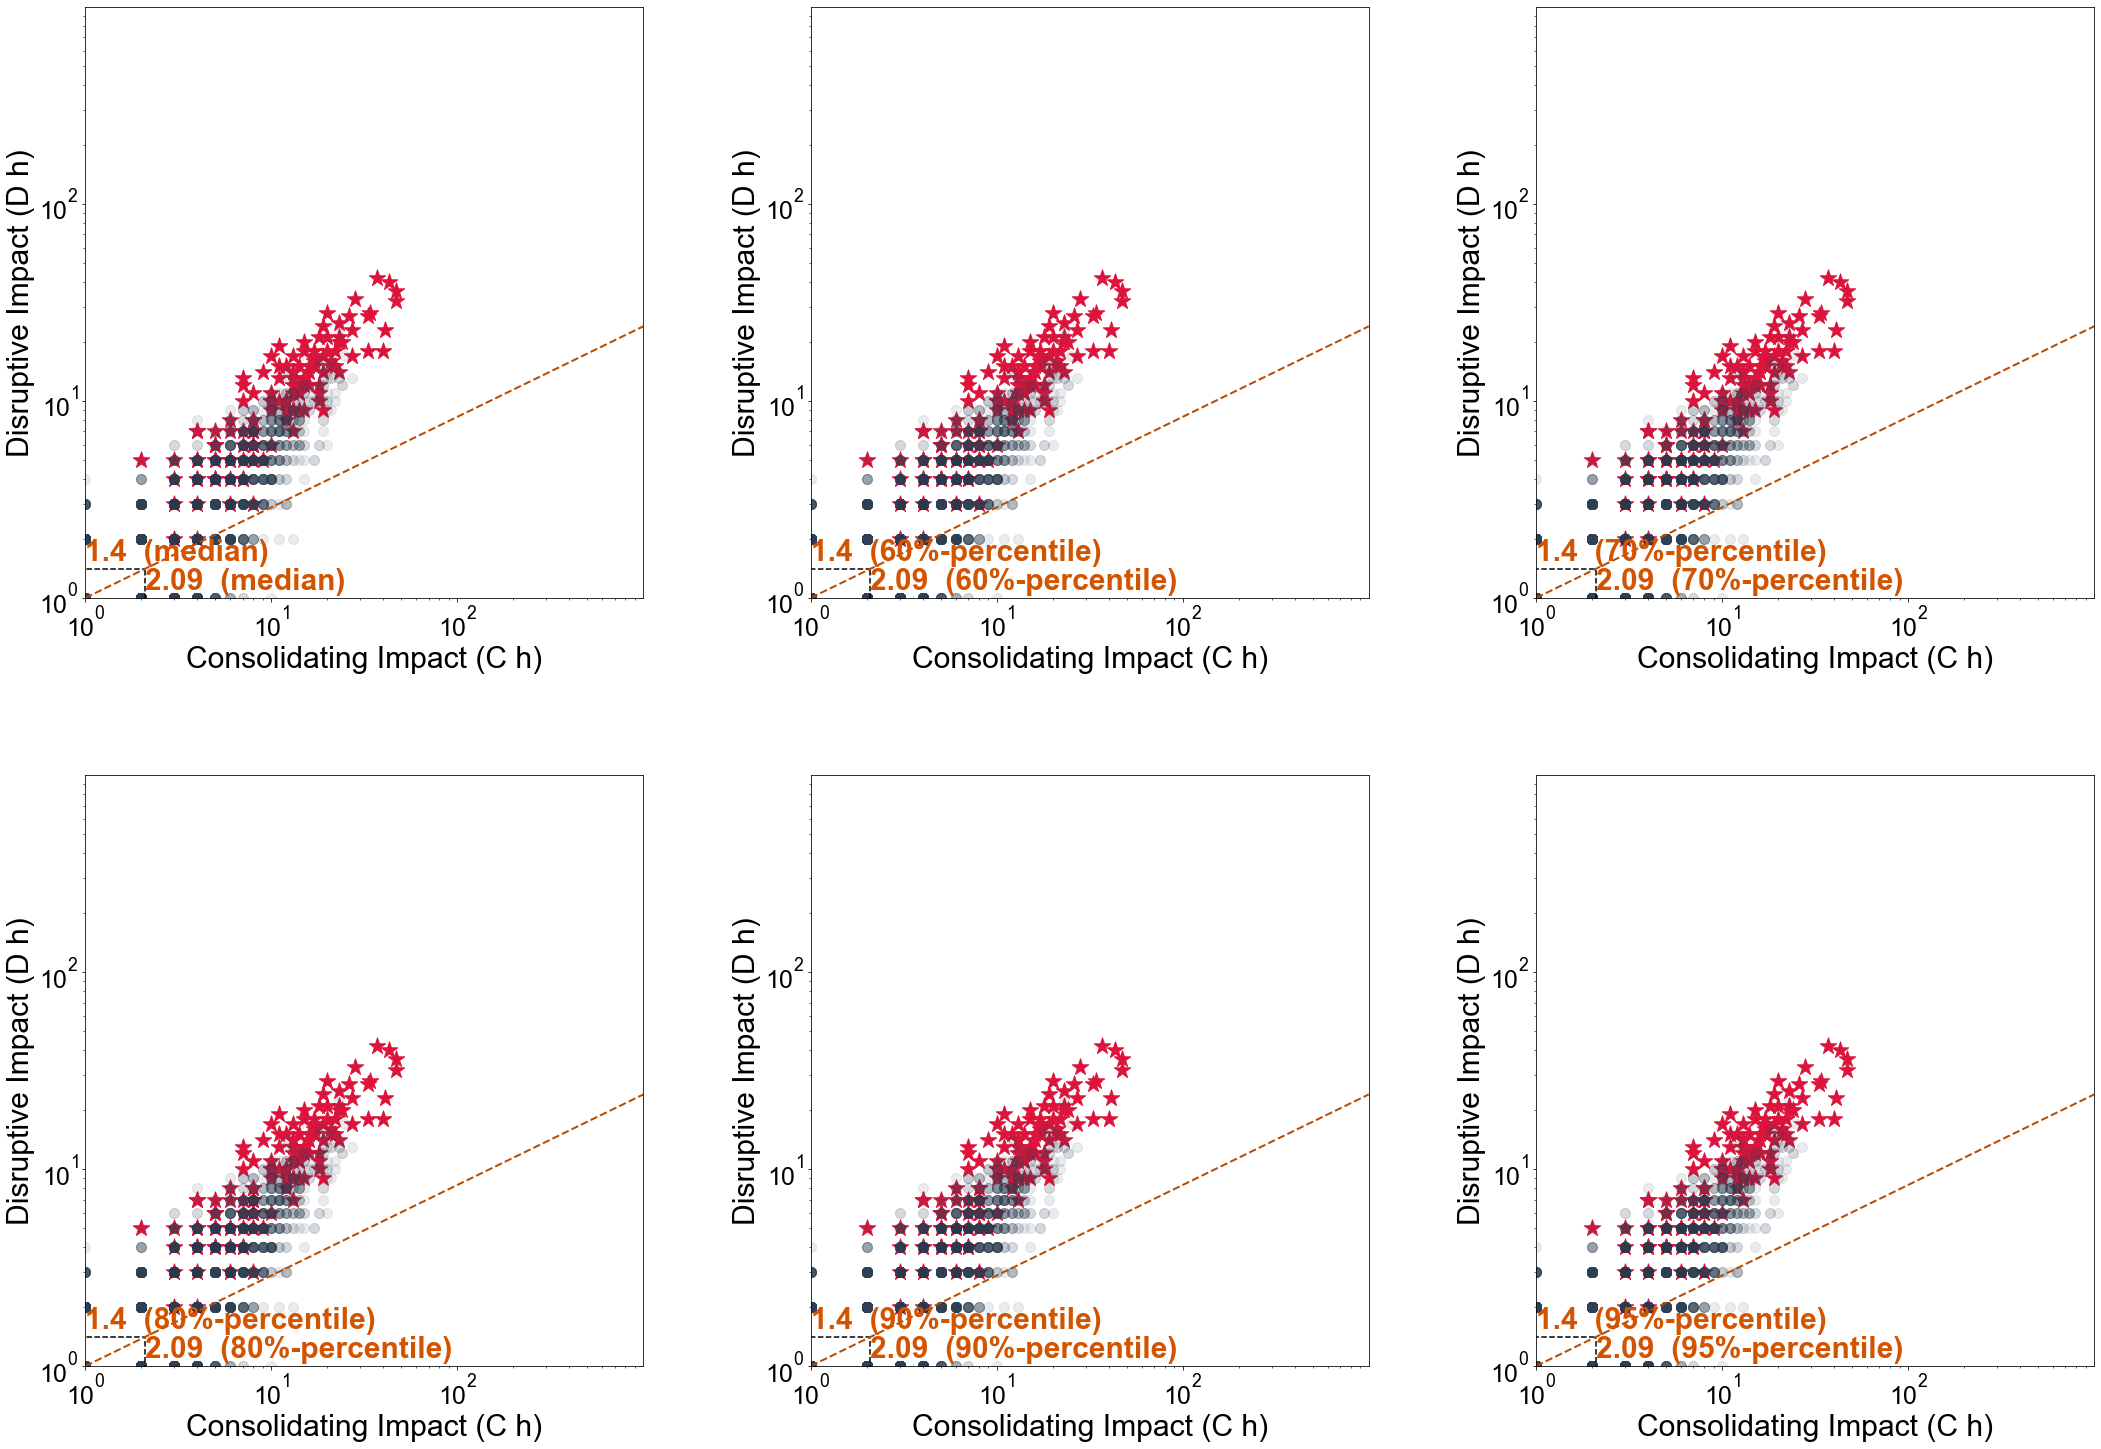

In [13]:
plt.subplots(2,3,figsize=(36,25))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.3)
sns.set_theme(style="ticks")
for _ in range(6):
    ax = plt.subplot(2,3,_+1)
    draw2(d1lst[_] , d2lst[_] , textlst[_])